In [16]:
# to install all dependencies use, uncomment the following line and restart the kernel
# %pip install -U -r requirements.txt

# Generative model for the superposition of spiking motifs

We design a model based on heterosynaptic delays. We will define in the assembly of neurons where each synapse
is defined by a weight *ws* at different delays *τs*. 

### generative & inference models for polychronous groups

In [17]:
from brainhack import *
opt = Params()
opt

Params(datetag='2022-11-28', N_pre=144, N_PG_time=71, N_PGs=35, E_PG=10.0, p_PG=0.005, tau_decay=0.4, tau_rise=0.05, N_time=1024, N_trials=10, p_B=0.001, p_A=0.001, seed=42, verbose=False, fig_width=12, phi=1.61803, N_PG_show=5)

In [18]:
env = ABCD(opt)

In [19]:
env.opt

Params(datetag='2022-11-28', N_pre=144, N_PG_time=71, N_PGs=35, E_PG=10.0, p_PG=0.005, tau_decay=0.4, tau_rise=0.05, N_time=1024, N_trials=10, p_B=0.001, p_A=0.001, seed=42, verbose=False, fig_width=12, phi=1.61803, N_PG_show=5)

## spiking motifs


In [20]:
len(env.spike)//2, env.spike.shape

(17, torch.Size([35, 35, 3]))

In [21]:
env = ABCD(opt)
a, b, PG = env.generative_model()

In [22]:
a.min(), a.max()

(tensor(0.), tensor(1.))

In [23]:
env.temporal_mod.shape

torch.Size([144, 35, 71])

In [24]:
PG.shape

torch.Size([144, 35, 71])

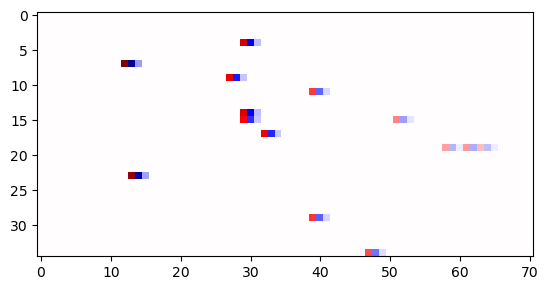

In [25]:
vmax = PG[0, :, :].abs().max()
plt.imshow(PG[0, :, :], cmap='seismic', vmin=-vmax, vmax=vmax)

# generative model with spiking motifs

In [26]:
opt = Params()
env = ABCD(opt)
a, b, PG = env.generative_model()
# env.plot_PG(PG);
# TODO find a better rule to generate PGs

Draw one instance of single PGs:

Draw the occurrences of PGs:

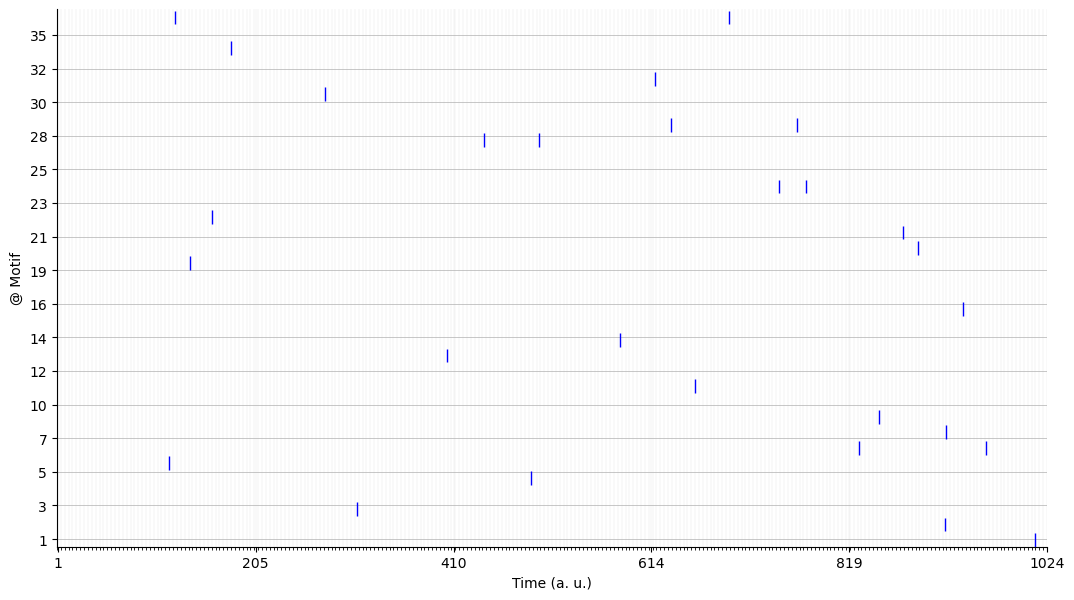

In [27]:
env.plot_b(b);

Resulting raster plot:

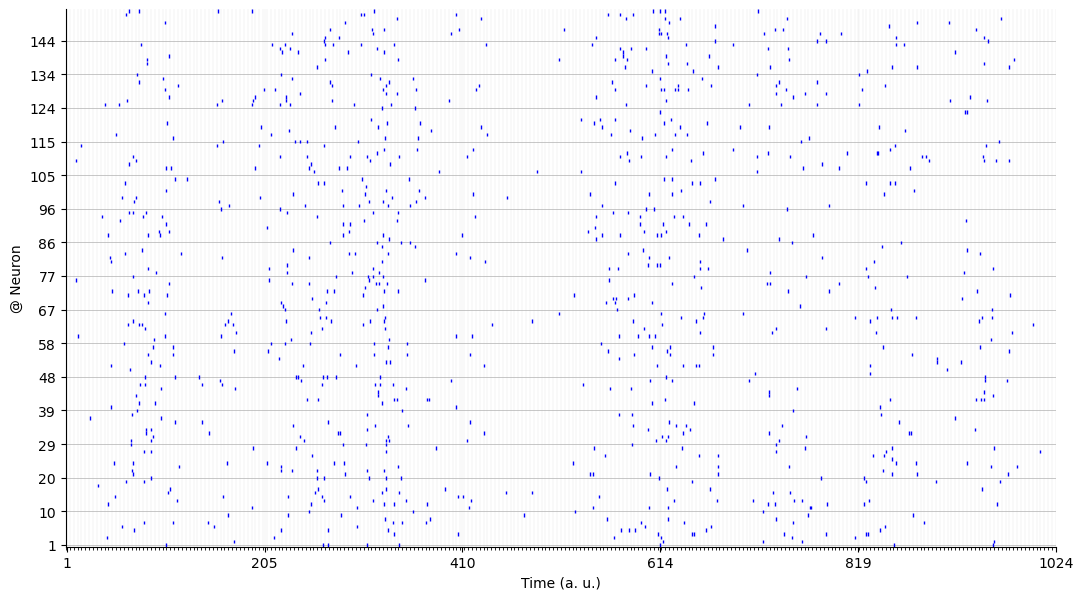

In [28]:
env.plot_a(a, i_trial=7);

In [29]:
a.mean(), b.mean(), b.mean(axis=(0, -1))

(tensor(0.007),
 tensor(0.001),
 tensor([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.000, 0.001, 0.000, 0.001, 0.001, 0.000, 0.001, 0.001, 0.001, 0.001,
         0.001, 0.000, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.000, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]))